In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#divide data into categorical and numerical columns
num=df.select_dtypes(include=['int64','float64'])
cat=df.select_dtypes(include=['object'])

In [7]:
num.shape

(891, 7)

In [8]:
cat.shape

(891, 5)

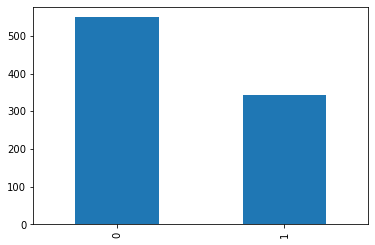

In [9]:
df['Survived'].value_counts().plot.bar()

In [10]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

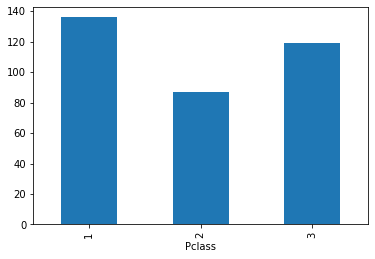

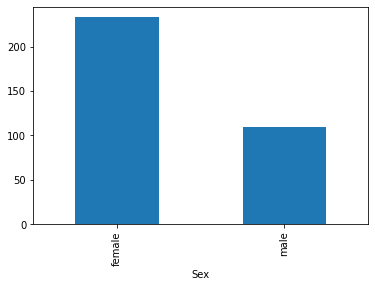

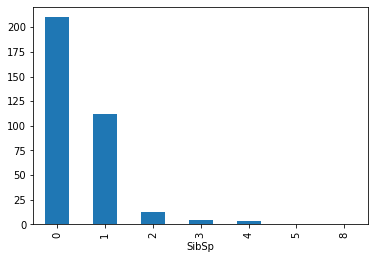

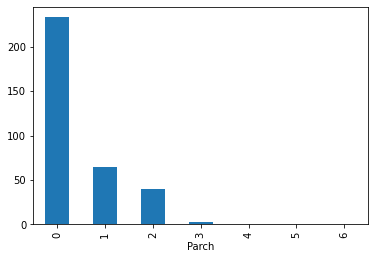

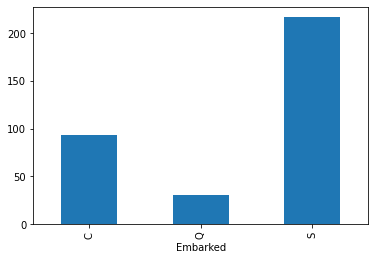

In [11]:
columns=['Pclass','Sex','SibSp','Parch','Embarked']
for i,col in enumerate(columns):
    df.groupby(col)['Survived'].sum().plot(kind='bar')
    plt.show()

In [12]:
cat.nunique() # drop Name and Ticket

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [13]:
#grouping Cabin as per event rate
seg=df[['Cabin','Survived']].groupby(by='Cabin').mean()
seg.rename(columns={'Survived':'Cabin_segs'},inplace=True);
seg.reset_index(inplace=True)
df=df.merge(seg,on='Cabin',how='outer')

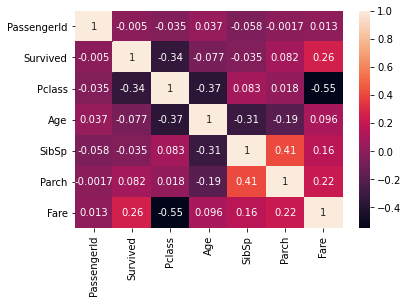

In [14]:
import seaborn as sns
sns.heatmap(num.corr(),annot=True);

In [15]:
def cramers_v(df):
    cv=pd.DataFrame(np.nan,index=df.columns,columns=df.columns)
    for i,row in enumerate(df.columns):
        for j,col in enumerate(df.columns):
            if j>i:
                ctab=pd.crosstab(df[row],df[col])
                k=min(ctab.shape[0],ctab.shape[1])
                chi,_,_,_=st.chi2_contingency(ctab)
                cv[row][col]= np.sqrt(chi/((df.shape[0])*(k-1)))
    return cv                

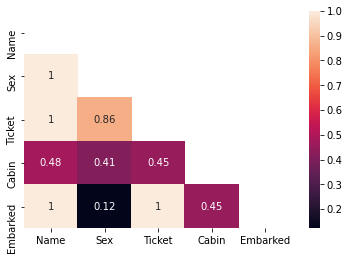

In [16]:
from scipy import stats as st
sns.heatmap(cramers_v(cat),annot=True);

In [17]:
#dropping Name, ticket and Passenger ID and Cabin
cols_drop=['Name','Ticket','PassengerId','Cabin','Survived']
X= df.drop(cols_drop,axis=1)
y= df['Survived']
#train/val split #stratification 
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

In [18]:
#missing value imputation
X_train['Age'].fillna(X_train['Age'].mean(),inplace=True)
X_val['Age'].fillna(X_train['Age'].mean(),inplace=True)

X_train['Cabin_segs'].fillna(X_train['Cabin_segs'].mean(),inplace=True)
X_val['Cabin_segs'].fillna(X_train['Cabin_segs'].mean(),inplace=True)

X_train['Embarked'].fillna(X_train.mode().loc[0,'Embarked'],inplace=True)
X_val['Embarked'].fillna(X_train.mode().loc[0,'Embarked'],inplace=True)

C:\Users\Smart\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_segs
456,3,male,47.0,0,0,7.2500,S,0.644444
411,3,male,17.0,1,1,7.2292,C,0.644444
226,3,male,19.0,0,0,8.0500,S,0.644444
828,1,female,36.0,0,2,71.0000,S,0.500000
381,3,male,21.0,0,0,7.2500,S,0.644444


In [20]:
#standardisation 
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train[['Age','Fare']]=scalar.fit_transform(X_train[['Age','Fare']])
X_val[['Age','Fare']]=scalar.transform(X_val[['Age','Fare']])

<ipython-input-20-dad33d5cfcc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['Age','Fare']]=scalar.fit_transform(X_train[['Age','Fare']])
C:\Users\Smart\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-20-dad33d5cfcc9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [21]:
#one hot encoding 
X_train=pd.get_dummies(X_train.copy())
X_val=pd.get_dummies(X_val.copy())

In [22]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_segs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
456,3,1.362767,0,0,-0.509907,0.644444,0,1,0,0,1
411,3,-0.981923,1,1,-0.510346,0.644444,0,1,1,0,0
226,3,-0.825610,0,0,-0.493022,0.644444,0,1,0,0,1
828,1,0.503047,0,2,0.835568,0.500000,1,0,0,0,1
381,3,-0.669298,0,0,-0.509907,0.644444,0,1,0,0,1


In [23]:
X_val.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_segs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
140,3,-0.669298,0,0,-0.495660,0.644444,0,1,0,0,1
656,3,3.472988,0,0,-0.498826,0.644444,0,1,0,0,1
535,3,-0.903767,0,0,-0.498387,0.644444,0,1,0,0,1
185,3,-0.044047,0,0,-0.498826,0.644444,0,1,0,0,1
350,3,-1.919799,2,1,-0.256466,0.644444,1,0,1,0,0


In [24]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(C=0.1,random_state=0,n_jobs=-1,class_weight='balanced', max_iter=100)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_val)
print('accuracy score is {}'.format(accuracy_score(y_pred,y_val)))

accuracy score is 0.8379888268156425


In [25]:
#Pipeline
'''
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)
'''


"\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.metrics import accuracy_score\n\npipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])\npipe.fit(X_train, y_train)\npipe.score(X_val, y_val)\n"

In [26]:
#Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV
Parameters={'C':[0.1,1,100,1000],'max_iter':[100,500,1000]}
clf = RandomizedSearchCV(lr, Parameters, random_state=0,scoring='accuracy',cv=5,n_jobs=-1)
search=clf.fit(X_train,y_train)
search.best_params_

{'max_iter': 100, 'C': 100}

In [27]:
lr_search=search.best_estimator_
y_pred_va=lr_search.predict(X_val)
print('accuracy score on validation data is {}'.format(accuracy_score(y_pred_va,y_val)))
y_pred_tr=lr_search.predict(X_train)
print('accuracy score on train data is {}'.format(accuracy_score(y_pred_tr,y_train)))

accuracy score on validation data is 0.8547486033519553
accuracy score on train data is 0.8370786516853933


In [28]:
#test data predictions
test=pd.read_csv('test.csv')

In [29]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
#data preprocessing
test=test.merge(seg,on='Cabin',how='left')
cols_drop=['Name','Ticket','PassengerId','Cabin']
X_test=test.drop(columns=cols_drop)
X_test['Age'].fillna(X_train['Age'].mean(),inplace=True)
X_test['Cabin_segs'].fillna(X_train['Cabin_segs'].mean(),inplace=True)
X_test['Fare'].fillna(X_train['Fare'].mean(),inplace=True)
X_test[['Age','Fare']]=scalar.transform(X_test[['Age','Fare']])
X_test=pd.get_dummies(X_test.copy())

In [31]:
y_pred_ts=lr_search.predict(X_test)

In [32]:
sub=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_pred_ts})
sub.set_index('PassengerId',inplace=True)
#sub.to_csv('sub.csv')

In [33]:
#logistic Regression using Tensorflow
import tensorflow as tf

In [35]:
num_tf=X_train.select_dtypes(include=['int64','float64'])
cat_tf=X_train.select_dtypes(include=['object'])

In [36]:
#Base Feature Columns
feature_columns = []
for feature_name in cat_tf.columns:
    vocabulary = X_train[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in num_tf.columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [37]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(X_train, y_train)
eval_input_fn = make_input_fn(X_val, y_val, num_epochs=1, shuffle=False)

In [38]:
ds = make_input_fn(X_train, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
    print('Some feature keys:', list(feature_batch.keys()))
    print()
    print('A batch of class:', feature_batch['Pclass'].numpy())
    print()
    print('A batch of Labels:', label_batch.numpy())

Some feature keys: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_segs', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

A batch of class: [3 3 3 3 2 3 2 1 3 2]

A batch of Labels: [0 0 0 0 1 0 1 0 1 0]


In [42]:
age_column = feature_columns[2]
tf.keras.layers.DenseFeatures([age_column])(feature_batch).numpy()

array([[2.],
       [0.],
       [4.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [44]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)
print(result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Smart\\AppData\\Local\\Temp\\tmpla3h_596', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorf